### Importing library:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### VD A.1:

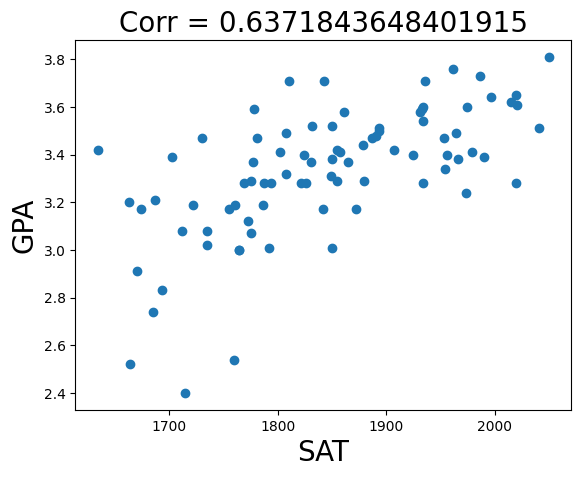

In [8]:
# Change to data path on your computer
data = pd.read_csv("SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.title(f'Corr = {data.corr().iloc[0,1]}', fontsize = 20)
plt.show()

In [9]:
k = 8
def distance(array, value):
    array = np.array(array)
    return abs(array - value)
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]
data_len = len(x)
X_train = np.array(x[:64])
Y_train = np.array(y[:64])
X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])

In [10]:
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i] / len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])

3.3925000000000005  |  3.51
3.2749999999999995  |  3.52
3.2949999999999995  |  3.52
3.3975000000000004  |  3.54
3.295  |  3.58
3.3974999999999995  |  3.58
3.3975000000000004  |  3.59
3.2587500000000005  |  3.59
3.3899999999999997  |  3.6
3.3975000000000004  |  3.6
3.3874999999999993  |  3.61
3.3874999999999993  |  3.62
3.3662499999999995  |  3.64
3.3874999999999993  |  3.65
3.2950000000000004  |  3.71
3.3975000000000004  |  3.71
3.30875  |  3.71
3.3662500000000004  |  3.73
3.37625  |  3.76
3.3874999999999993  |  3.81


Evaluate:

In [11]:
print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 score: ', r2_score(Y_test, Y_pred))

Mean squared error:  0.08137789062500003
Mean absolute error:  0.2711875000000001
R2 score:  -10.951518670142466


### VD A.2:

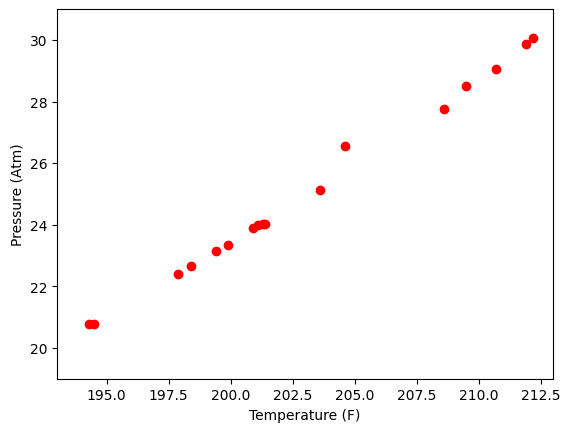

In [12]:
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

X = X.squeeze()
y = y.squeeze()

In [13]:
def calculate_distance(x, y):
    x = np.array(x)
    return abs(x - y)

def find_nearest_index(value, X_train, k):
    dist = calculate_distance(X_train, value)
    indexes = np.argsort(dist)[:k]
    return indexes
    

In [14]:
X_train = X[:16]
y_train = y[:16]
X_test = X[16:]
y_test = y[16:]

k = 4

y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    k_idx = find_nearest_index(X_test[i], X_train, k)
    y_cml = 0.0
    for idx in k_idx:
        y_cml += y_train[idx]
    y_pred[i] = y_cml / k

for i in range(len(X_test)):
    print(f'{X_test[i]} | {y_pred[i]}')

212.2 | 28.7925


Evaluate:

In [15]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
# can not calculate r2

MSE: 1.6065562499999957
MAE: 1.2674999999999983


### VD A.3:

In [19]:
data = pd.read_csv('fuel.txt')
data['Fuel'] = data['FuelC'] * 1000 / data['Pop']
data['Dlic'] = 1000 * data['Drivers'] / data['Pop']
data['log(Miles)'] = np.log2(data['Miles'])
data.drop(['State', 'MPC', 'FuelC', 'Pop', 'Drivers', 'Miles'], inplace=True, axis=1)
data.head()

,Income,Tax,Fuel,Dlic,log(Miles)
0,23471,18.0,690.264418,1031.380067,16.527110
1,30064,8.0,514.279223,1031.641062,13.734286
2,25578,18.0,621.475071,908.597153,15.753556
3,22257,21.7,655.292668,946.570576,16.582436
4,32275,18.0,573.912855,844.703336,17.364708


In [22]:
X = data.drop(['Fuel'], axis=1).to_numpy()
y = data['Fuel'].to_numpy()

X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

In [115]:
def calculate_distance(value, X_train):
    dist = np.zeros(len(X_train))
    for idx, row in X_train.iterrows():
        dist[idx] = np.linalg.norm(row.tolist() - value, ord=2)
    return dist

def find_nearest_index(value, X_train, k):
    dist = calculate_distance(value, X_train)
    return np.argsort(dist)[:k]

In [25]:
k = 6
 
y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexes = find_nearest_index(X_test[i], X_train, k)
    y_pred[i] = np.mean([y_train[idx] for idx in indexes])

for i in range(len(X_test)):
    print(f'{X_test[i]} | {y_pred[i]}')

[2.43210000e+04 1.60000000e+01 9.14852671e+02 1.60138242e+01] | 620.3278448859404
[2.61150000e+04 2.20000000e+01 9.43895904e+02 1.63505249e+01] | 620.3278448859404
[2.62390000e+04 2.00000000e+01 9.42044365e+02 1.64223605e+01] | 620.3278448859404
[2.78710000e+04 2.00000000e+01 8.35295555e+02 1.81982868e+01] | 620.3278448859404
[2.39070000e+04 2.45000000e+01 9.35788546e+02 1.53652288e+01] | 620.3278448859404
[2.69010000e+04 2.00000000e+01 1.07528820e+03 1.38028193e+01] | 620.3278448859404
[3.11620000e+04 1.75000000e+01 8.89919514e+02 1.61098511e+01] | 620.3278448859404
[3.15280000e+04 2.30000000e+01 9.30856246e+02 1.63053671e+01] | 620.3278448859404
[2.19150000e+04 2.56500000e+01 9.04893601e+02 1.51751207e+01] | 620.3278448859404
[2.82320000e+04 2.73000000e+01 8.82329081e+02 1.67816543e+01] | 620.3278448859404
[2.72300000e+04 1.40000000e+01 9.70752746e+02 1.47361905e+01] | 620.3278448859404


Evaluate:

In [27]:
print(f'MSE: {mean_squared_error(y_pred, y_test)}')
print(f'MAE: {mean_absolute_error(y_pred, y_test)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 7641.576483154135
MAE: 70.01861251545084
R2: -0.2516032057365385
